In [36]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (12,8)

### Mean Squared Error of Q-Estimation

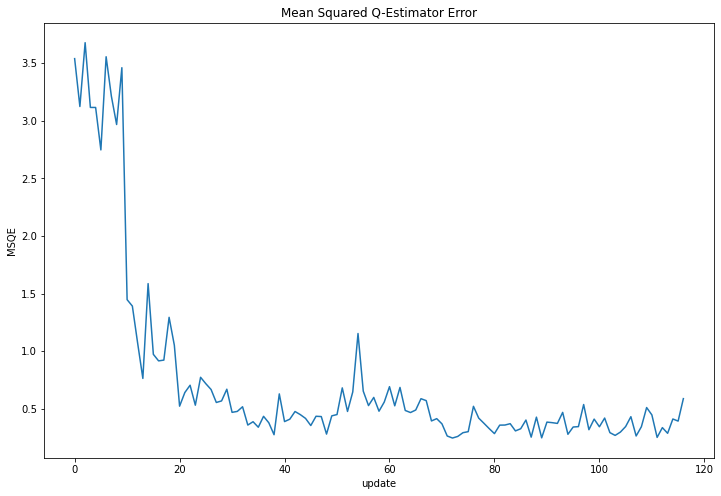

In [166]:
msqe = np.loadtxt("./logs/defect.log")

fig, ax = plt.subplots()

ax.plot(msqe)

ax.set_title("Mean Squared Q-Estimator Error")
ax.set_xlabel("update")
ax.set_ylabel("MSQE")

plt.show()

### Runtime

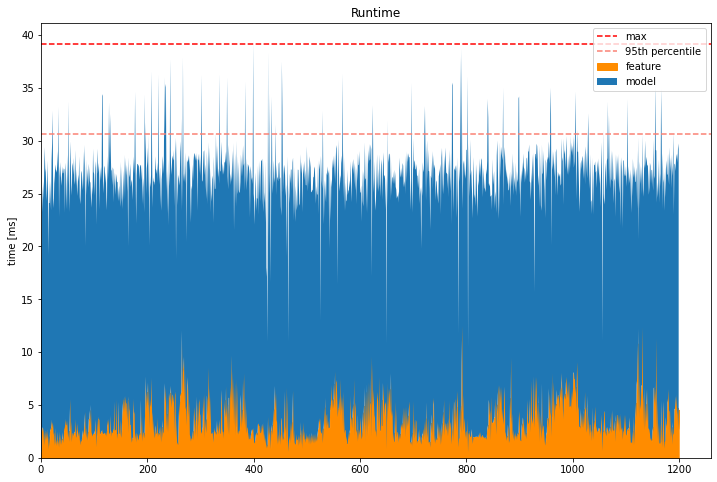

In [154]:
timings = np.loadtxt("./logs/timing.log", delimiter=',')

t_feature = timings[:,0] * 1000
t_complete = timings[:, 1] * 1000

N = len(t_feature)

fig, ax = plt.subplots()

max_time = np.max(t_complete)
percentile_95 = np.percentile(t_complete, 95)

ax.fill_between(range(N), t_feature, color='darkorange', label="feature")
ax.fill_between(range(N), t_feature , t_complete, label="model")

plt.axhline(y=max_time, color='red', linestyle='--', label='max')
plt.axhline(y=percentile_95, color='salmon', linestyle='--', label='95th percentile')

ax.set_title("Runtime")
ax.set_ylabel("time [ms]")
ax.legend(loc='upper right')
ax.set_xlim(0)
ax.set_ylim(0)

plt.show()